In [5]:
import pandas as pd
from pathlib import Path
import seaborn as sns

import os

os.environ["DB_PATH"]='../../../db.json'
from neuroblu_postgres.databaseIO import pgIO

import spacy
nlp=spacy.load("en_core_sci_scibert")
def tokeniseUsingSciSpacy(sentence):
    doc = nlp(sentence)
    cleaned_data=list(item.text for item in doc.sents)
    return cleaned_data
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
tqdm().pandas()

0it [00:00, ?it/s]


In [6]:
import re

In [22]:
def cleanNote(text:str):
    '''
    Given a clinician note, attempt to clean it by remove irrelevant 
    line breaks, characters that will affect sentence tokenization.
    '''
    text = re.sub(pattern=';',
                  repl=" \r\n ",
                  string=text)
    
    text = re.sub(pattern='[-_\s=+\r\n]{3,}',
                  repl="\r\n",
                  string=text)
    
    return text


from NoteToSent.noteToSent import sentenceTokenizer

In [8]:
x ='''
                      Also has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what.
                      
                      Also very interesting experience here \r\nThings that I like were here.
                      This is interesting\r\nI lied to them yesterday.
                      This is interesting \r\n I lied to them yesterday.
                      '''
sent_tokenize(x)

["\n                      Also has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what.",
 'Also very interesting experience here \r\nThings that I like were here.',
 'This is interesting\r\nI lied to them yesterday.',
 'This is interesting \r\n I lied to them yesterday.']

In [9]:
tokeniseUsingSciSpacy(x)

User provided device_type of 'cuda', but CUDA is not available. Disabling


["\n                      Also has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what.\n                      \n                      Also very interesting experience here \r\nThings that I like were here.\n                      ",
 'This is interesting',
 '\r\nI lied to them yesterday.',
 '\n                      This is interesting \r\n I lied to them yesterday.',
 '\n                      ']

In [10]:
for each in sent_tokenize(x):
    print(tokeniseUsingSciSpacy(each))

["\n                      Also has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what."]
['Also very interesting experience here \r\nThings that I like were here.']
['This is interesting', '\r\nI lied to them yesterday.']
['This is interesting', '\r\n I lied to them yesterday.']


In [11]:
sent_tokenize(cleanNote(x))

["\r\nAlso has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what.",
 'Also very interesting experience here\r\nThings that I like were here.',
 'This is interesting\r\nI lied to them yesterday.',
 'This is interesting\r\nI lied to them yesterday.']

In [12]:
tokeniseUsingSciSpacy(cleanNote(x))

User provided device_type of 'cuda', but CUDA is not available. Disabling


["\r\nAlso has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what.\r\nAlso very interesting experience here\r\nThings that I like were here.\r\n",
 'This is interesting',
 '\r\nI lied to them yesterday.',
 '\r\nThis is interesting\r\nI lied to them yesterday.',
 '\r\n']

In [13]:
for each in sent_tokenize(cleanNote(x)):
    print(tokeniseUsingSciSpacy(each))

["\r\nAlso has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what."]
['Also very interesting experience here\r\nThings that I like were here.']
['This is interesting', '\r\nI lied to them yesterday.']
['This is interesting', '\r\nI lied to them yesterday.']


In [16]:
cleanNote(x).split('\n')


['\r',
 "Also has constipoation which I told her she could try Senokot-S. Did state there are things that make her laugh, but couldn't tell me what.\r",
 'Also very interesting experience here\r',
 'Things that I like were here.\r',
 'This is interesting\r',
 'I lied to them yesterday.\r',
 'This is interesting\r',
 'I lied to them yesterday.\r',
 '']

In [19]:
data = pd.read_csv('breakingFromResponseTable/responSectionTextsDf_nltkSciSpacy_break.csv')
display(data.shape)
data.head()

(9167, 7)

,patient_encounter_id,header,section,nltk_break,nltk_break_order,sciSpacy_break,SciSpacedSentenceIdex
0,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1.0,"pt accompanied by his mother , his new persona...",1
1,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1.0,& cw pt was recently hosp at [LOCATION_3] [DAT...,2
2,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1.0,& stated he made this false statement in order...,3
3,1439220,22507,"pt accompanied by his mother , his new persona...","pt accompanied by his mother , his new persona...",1.0,& once again discussed that it is crucial for ...,4
4,1474333,22507,pt reported he has not been doing well b/c he ...,pt reported he has not been doing well b/c he ...,1.0,pt reported he has not been doing well b/c he ...,1


<AxesSubplot:xlabel='sciSpacy_break'>

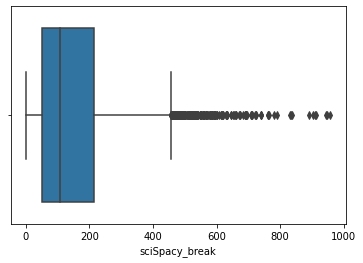

In [30]:
sns.boxplot(x=data.sciSpacy_break.str.count(' '))

In [27]:
newSent = data.sciSpacy_break.progress_apply(
    lambda sent: list(sentenceTokenizer(cleanNote(sent), scibert=False))
)

100%|██████████| 9167/9167 [00:01<00:00, 6401.47it/s]


<AxesSubplot:xlabel='sciSpacy_break'>

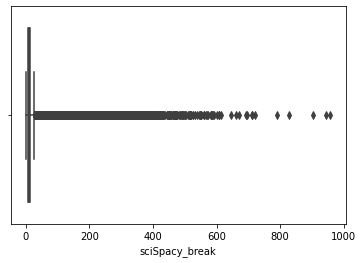

In [29]:

sns.boxplot(x=newSent.explode().str.count(' '))

In [32]:
newSentDf = newSent.explode().reset_index()
newSentDf['nToken']=newSentDf.sciSpacy_break.str.count(' ')

In [37]:
newSentDf.loc[newSentDf.nToken>800, 'sciSpacy_break'].iloc[2] # .count('.')

"he is going to school to finish associate degree in automotive, in spring semester, working on getting financial assisstance calm and cooperative, came along way compared to how he was two years ago [DATE_8] no changes in meds last visit, reports doing well on the higher dose of wellbutrin, overwhelmed hiself with course, took 5 and failed three, he will have to repeat them was referred to therapy, has not started yet [DATE_9] was seen last visit at the nurse's office and complained of inc depression dt to mareital conflict, wellbutrin was inc, was discussed in staff, wife i older and has multiple medical problems, no intersted in sex, he cheated on her because of that and had lots of guilt feeling he reports that incresing the wellbutrin has made a big difference, not depressed, much better focusing no SI/HI or pyshosis [DATE_10] This is 44 y/o [NAME_2] who has a history of Bipolar DO, PTSD, PSD, has been sober and clean, today he reports he continues to do very well and denied any s